#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Ειρήνη Δόντη 03119839


##1. Θεωρητικό μέρος

1. Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση
ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν
τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα.
2. Ποιες είναι οι βασικές διαφορές στην αρχιτεκτονική και την απόδοση μεταξύ των τριών
δικτύων;


1.

Παρακάτω παρουσιάζεται ο συγκριτικός πίνακας με τα επίπεδα:

<table>
  <tr>
    <th> </th>
    <th><i>LeNet</i></th>
    <th><i>AlexNet</i></th>
    <th><i>VGG</i></th>
  </tr>
  <tr>
    <td><b><i>Επίπεδα</i></b></td>
    <td><center>7</td>
    <td><center>8</td>
    <td><center>16</td>
  </tr>
  <tr>
    <td><b><i>Μέγεθος Φίλτρων</i></td>
    <td><center>5x5x3 <br>kernel-sized filters</td>
    <td><center>11x11x3, 5x5x3, 3x3x3 <br>kernel-sized filters</td>
    <td><center>3x3x3 <br>kernel-sized filters</td>
  </tr>
  <tr>
    <td><b><i>Συνάρτηση Ενεργοποίησης</i></td>
    <td><center>Sigmoid</td>
    <td><center>ReLU</td>
    <td><center>ReLU</td>
  </tr>
  <tr>
    <td><b><i>Πλήθος παραμέτρων</i></td>
    <td><center>3,246</td>
    <td><center>62 million</td>
    <td><center>138 million</td>
  </tr>
  <tr>
    <td><b><i>Τεχνικές pooling</i></td>
    <td><center>2x2 average pooling<br> with stride of 2</td>
    <td><center>3x3 maximum pooling<br> with stride of 2</td>
    <td><center>2x2 maximum pooling<br> with stride of 2</td>
  </tr>
  <tr>
    <td><b><i>dropout</i></td>
    <td><center>-</td>
    <td><center>0.5</td>
    <td><center>0.5</td>
  </tr>
</table> <br> 


2.

Σχολιασμός βασικών διαφορών στην αρχιτεκτονική και την απόδοση μεταξύ των τριών
δικτύων:

**LeNet:** Έχει την απλούστερη αρχιτεκτονική με τα λιγότερα επίπεδα και τις λιγότερες εκπαιδεύσιμες παραμέτρους, αφού προορίζεται για ταξινόμηση σε 10 κλάσεις. Επίσης, χρησιμοποιεί συνάρτηση ενεργοποίησης Sigmoid έναντι της ReLU που χρησιμοποιούν τα άλλα δυο μοντέλα. Επιπλέον, χρησιμοποιείται average pooling ενώ στα άλλα δύο maximum pooling.

---

**AlexNet:** Χρησιμοποιεί τρία διαφορετικά μεγέθη φίλτρων σε σχέση με τα υπόλοιπα, γεγονός που οφείλεται στο μέγεθος της αρχικής εικόνας (224x224 pixel). Επίσης, χρησιμοποιεί την συνάρτηση ενεργοποίησης ReLU και dropout με τιμή 0.5.

---

**VGG:** Έχει το μεγαλύτερο πλήθος εκπαιδεύσιμων παραμέτρων και τα περισσότερα επίπεδα, γεγονός που το καθιστά το πιο χρονοβόρο στην εκπαίδευση.
Η χρήση συναρτήσεων ενεργοποίησης συνέβαλε στη σταδιακή αύξηση της ακρίβειας ταξινόμησης μετατρέποντας την εκπαίδευση μη-γραμμική. Επίσης, η χρήση πολλαπλών επιπέδων, διευκολύνει τη σταδιακή αύξηση της ακρίβειας, καθώς από μια εικόνα εξάγονται τα χαρακτηριστικά που βοηθούν στην ταξινόμησή της. Τέλος, η χρήση pooling και dropout βοηθούν στην αντιμετώπιση προβλημάτων όπως το overfitting και το vanishing gradient.

##2. Υλοποίηση αλγορίθμου

### Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 98

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' baby', ' bottle', ' bowl', ' boy', ' bridge', ' butterfly', ' caterpillar', ' couch', ' lawn_mower', ' motorcycle', ' orchid', ' possum', ' rabbit', ' raccoon', ' road', ' shark', ' spider', ' squirrel', ' sweet_pepper', ' tulip']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


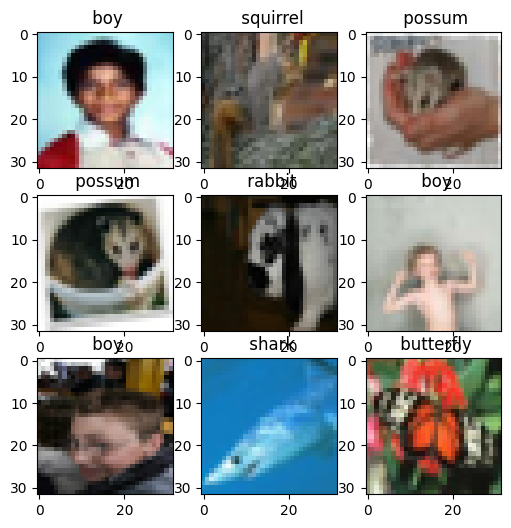

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
dictionary = {}
train_labels = y_train
i=0
for num_label in  y_train.reshape(-1):
  if num_label not in dictionary.keys():
    dictionary[num_label] = i
    i+=1
    if(i>20): print(i,"Error")

y_train = np.array([[dictionary[label]] for label in y_train.reshape(-1)])  
y_test = np.array([[dictionary[label]] for label in y_test.reshape(-1)])
y_val = np.array([[dictionary[label]] for label in y_val.reshape(-1)])

### Ερώτημα 1
---
##### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).
---
  
##### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

##### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


Για την εκπαίδευση των μοντέλων, χρησιμοποιήσαμε 20 εποχές, γιατί παρατηρήσαμε ότι φτάνουν αρκετά κοντά στη βέλτιστη ακρίβεια.

In [ ]:
def train(model, epochs, batch_size, callbacks = None):
  return model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks = callbacks, validation_data=(x_val, y_val))

In [ ]:
def plot(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')
  plt.show()

**LeNet**

In [ ]:
def LeNet_builder(optimizer, epochs, batch_size):
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(28, 28, interpolation="bilinear", input_shape=x_train.shape[1:]))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=2, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
  model.add(layers.BatchNormalization())
  model.add(layers.AveragePooling2D(pool_size=2, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(120, activation='sigmoid'))
  model.add(layers.Dense(84, activation='sigmoid'))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  history= train(model, epochs, batch_size)
  return model , history

------------------------LeNet-------------------------------
#1 optimizer = Adam, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 6s 10ms/step - loss: 2.6380 - accuracy: 0.2292 - val_loss: 2.6684 - val_accuracy: 0.2067
Epoch 2/20
266/266 [==============================] - 1s 6ms/step - loss: 2.3524 - accuracy: 0.3001 - val_loss: 2.3082 - val_accuracy: 0.2867
Epoch 3/20
266/266 [==============================] - 2s 6ms/step - loss: 2.2108 - accuracy: 0.3353 - val_loss: 2.2409 - val_accuracy: 0.3013
Epoch 4/20
266/266 [==============================] - 2s 6ms/step - loss: 2.0850 - accuracy: 0.3681 - val_loss: 2.1408 - val_accuracy: 0.3320
Epoch 5/20
266/266 [==============================] - 2s 6ms/step - loss: 1.9846 - accuracy: 0.3939 - val_loss: 2.0537 - val_accuracy: 0.3580
Epoch 6/20
266/266 [==============================] - 2s 6ms/step - loss: 1.8976 - accuracy: 0.4184 - val_loss: 2.0137 - val_accuracy: 0.3740
Epoch 7/20
266/266 [================

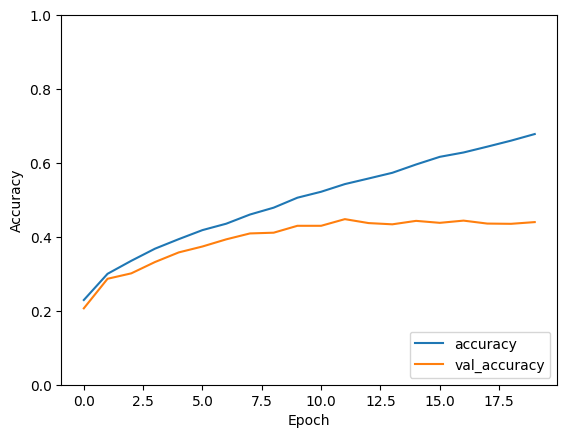

------------------------LeNet-------------------------------
#2 optimizer = SGD, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 3s 6ms/step - loss: 3.0108 - accuracy: 0.0725 - val_loss: 2.9884 - val_accuracy: 0.0533
Epoch 2/20
266/266 [==============================] - 1s 5ms/step - loss: 2.9363 - accuracy: 0.1373 - val_loss: 2.9298 - val_accuracy: 0.1453
Epoch 3/20
266/266 [==============================] - 1s 5ms/step - loss: 2.8948 - accuracy: 0.1687 - val_loss: 2.8853 - val_accuracy: 0.1747
Epoch 4/20
266/266 [==============================] - 1s 5ms/step - loss: 2.8538 - accuracy: 0.1876 - val_loss: 2.8475 - val_accuracy: 0.1687
Epoch 5/20
266/266 [==============================] - 1s 5ms/step - loss: 2.8131 - accuracy: 0.1896 - val_loss: 2.8096 - val_accuracy: 0.1853
Epoch 6/20
266/266 [==============================] - 2s 7ms/step - loss: 2.7734 - accuracy: 0.2027 - val_loss: 2.7690 - val_accuracy: 0.1913
Epoch 7/20
266/266 [==================

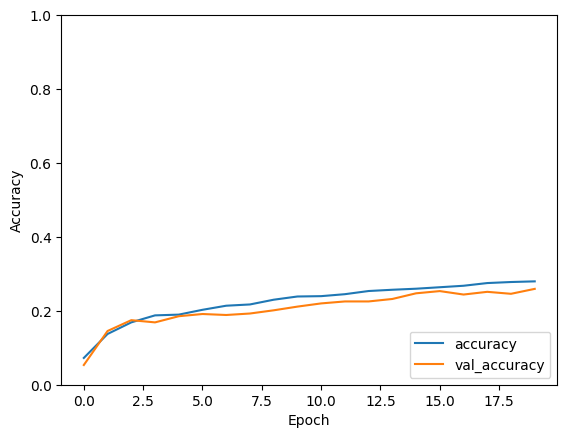

------------------------LeNet-------------------------------
#3 optimizer = Adam, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 4s 16ms/step - loss: 2.7748 - accuracy: 0.1932 - val_loss: 2.9974 - val_accuracy: 0.0560
Epoch 2/20
67/67 [==============================] - 1s 9ms/step - loss: 2.5101 - accuracy: 0.2758 - val_loss: 2.9159 - val_accuracy: 0.1500
Epoch 3/20
67/67 [==============================] - 1s 9ms/step - loss: 2.3672 - accuracy: 0.3026 - val_loss: 2.9340 - val_accuracy: 0.1220
Epoch 4/20
67/67 [==============================] - 1s 8ms/step - loss: 2.2688 - accuracy: 0.3224 - val_loss: 2.9004 - val_accuracy: 0.1120
Epoch 5/20
67/67 [==============================] - 0s 7ms/step - loss: 2.1863 - accuracy: 0.3445 - val_loss: 2.7150 - val_accuracy: 0.1820
Epoch 6/20
67/67 [==============================] - 0s 7ms/step - loss: 2.1209 - accuracy: 0.3631 - val_loss: 2.5779 - val_accuracy: 0.2080
Epoch 7/20
67/67 [=============================

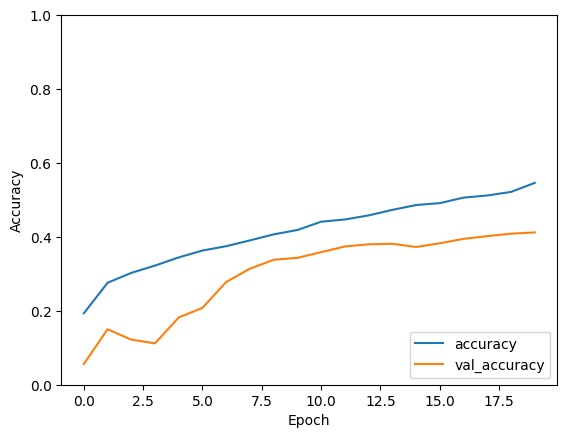

------------------------LeNet-------------------------------
#4 optimizer = SGD, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 4s 20ms/step - loss: 3.0773 - accuracy: 0.0505 - val_loss: 3.0253 - val_accuracy: 0.0467
Epoch 2/20
67/67 [==============================] - 1s 14ms/step - loss: 2.9886 - accuracy: 0.0591 - val_loss: 3.0029 - val_accuracy: 0.0467
Epoch 3/20
67/67 [==============================] - 1s 13ms/step - loss: 2.9667 - accuracy: 0.1046 - val_loss: 2.9945 - val_accuracy: 0.0520
Epoch 4/20
67/67 [==============================] - 0s 7ms/step - loss: 2.9534 - accuracy: 0.1491 - val_loss: 2.9843 - val_accuracy: 0.0893
Epoch 5/20
67/67 [==============================] - 0s 7ms/step - loss: 2.9419 - accuracy: 0.1665 - val_loss: 2.9682 - val_accuracy: 0.1393
Epoch 6/20
67/67 [==============================] - 0s 7ms/step - loss: 2.9309 - accuracy: 0.1791 - val_loss: 2.9489 - val_accuracy: 0.1687
Epoch 7/20
67/67 [============================

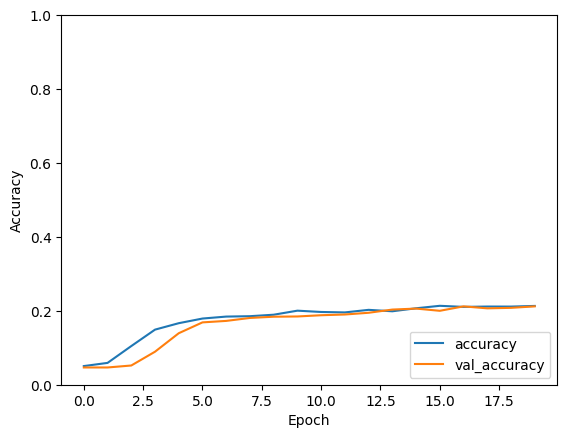

In [ ]:
print("------------------------LeNet-------------------------------")
print ("#1 optimizer = Adam, epochs = 20, batch size = 32" )
LeNet_1, history_LeNet_1 = LeNet_builder('adam',20,32)
plot(history_LeNet_1)
print("------------------------LeNet-------------------------------")
print ("#2 optimizer = SGD, epochs = 20, batch size = 32" )
LeNet_2, history_LeNet_2 = LeNet_builder('sgd', 20, 32)
plot(history_LeNet_2)
print("------------------------LeNet-------------------------------")
print ("#3 optimizer = Adam, epochs = 20, batch size = 128" )
LeNet_3, history_LeNet_3 = LeNet_builder('adam', 20, 128)
plot(history_LeNet_3)
print("------------------------LeNet-------------------------------")
print ("#4 optimizer = SGD, epochs = 20, batch size = 128" )
LeNet_4, history_LeNet_4 = LeNet_builder('sgd', 20, 128)
plot(history_LeNet_4)

**AlexNet**

In [ ]:
def AlexNet_builder(optimizer, epochs, batch_size):
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=3, strides=2))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  history= train(model, epochs, batch_size)
  
  return model, history

------------------------AlexNet-------------------------------
#1 optimizer = Adam, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 52s 51ms/step - loss: 4.0295 - accuracy: 0.1721 - val_loss: 2.6308 - val_accuracy: 0.2447
Epoch 2/20
266/266 [==============================] - 12s 46ms/step - loss: 2.7043 - accuracy: 0.2358 - val_loss: 2.8094 - val_accuracy: 0.2273
Epoch 3/20
266/266 [==============================] - 12s 47ms/step - loss: 2.6047 - accuracy: 0.2528 - val_loss: 2.4098 - val_accuracy: 0.2740
Epoch 4/20
266/266 [==============================] - 13s 47ms/step - loss: 2.4701 - accuracy: 0.2778 - val_loss: 2.6556 - val_accuracy: 0.2140
Epoch 5/20
266/266 [==============================] - 13s 48ms/step - loss: 2.3969 - accuracy: 0.2982 - val_loss: 2.2146 - val_accuracy: 0.3520
Epoch 6/20
266/266 [==============================] - 12s 47ms/step - loss: 2.3185 - accuracy: 0.3304 - val_loss: 2.3149 - val_accuracy: 0.3287
Epoch 7/20
266/266 [===

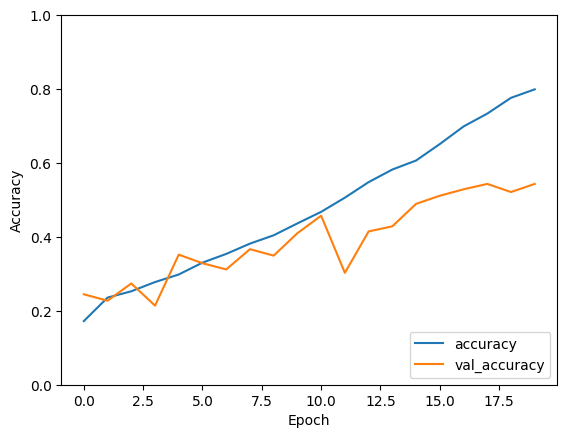

------------------------AlexNet-------------------------------
#2 optimizer = SGD, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 15s 46ms/step - loss: 2.9174 - accuracy: 0.2306 - val_loss: 2.2346 - val_accuracy: 0.3280
Epoch 2/20
266/266 [==============================] - 13s 47ms/step - loss: 2.1860 - accuracy: 0.3562 - val_loss: 2.0990 - val_accuracy: 0.3580
Epoch 3/20
266/266 [==============================] - 12s 45ms/step - loss: 1.8685 - accuracy: 0.4292 - val_loss: 1.9053 - val_accuracy: 0.4280
Epoch 4/20
266/266 [==============================] - 12s 45ms/step - loss: 1.6657 - accuracy: 0.4840 - val_loss: 2.3200 - val_accuracy: 0.3153
Epoch 5/20
266/266 [==============================] - 12s 44ms/step - loss: 1.5227 - accuracy: 0.5173 - val_loss: 2.0522 - val_accuracy: 0.3793
Epoch 6/20
266/266 [==============================] - 12s 45ms/step - loss: 1.3609 - accuracy: 0.5620 - val_loss: 1.5766 - val_accuracy: 0.5173
Epoch 7/20
266/266 [====

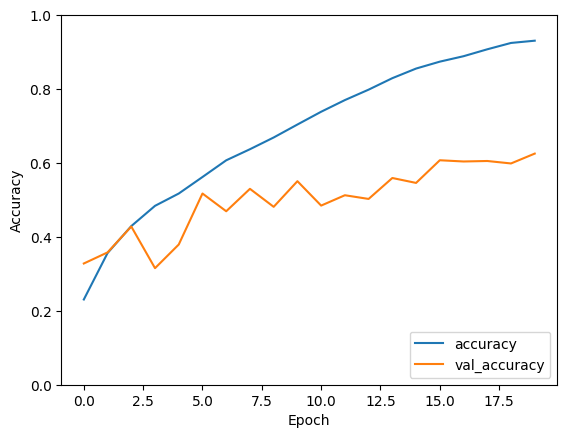

------------------------AlexNet-------------------------------
#3 optimizer = Adam, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 23s 205ms/step - loss: 4.0848 - accuracy: 0.1862 - val_loss: 13.7892 - val_accuracy: 0.0820
Epoch 2/20
67/67 [==============================] - 10s 144ms/step - loss: 2.4655 - accuracy: 0.2659 - val_loss: 10.7774 - val_accuracy: 0.1453
Epoch 3/20
67/67 [==============================] - 10s 145ms/step - loss: 2.3568 - accuracy: 0.2992 - val_loss: 3.5555 - val_accuracy: 0.2047
Epoch 4/20
67/67 [==============================] - 10s 147ms/step - loss: 2.2491 - accuracy: 0.3302 - val_loss: 2.5429 - val_accuracy: 0.2607
Epoch 5/20
67/67 [==============================] - 10s 145ms/step - loss: 2.1421 - accuracy: 0.3589 - val_loss: 2.1583 - val_accuracy: 0.3593
Epoch 6/20
67/67 [==============================] - 10s 143ms/step - loss: 2.0134 - accuracy: 0.3944 - val_loss: 2.2936 - val_accuracy: 0.3513
Epoch 7/20
67/67 [========

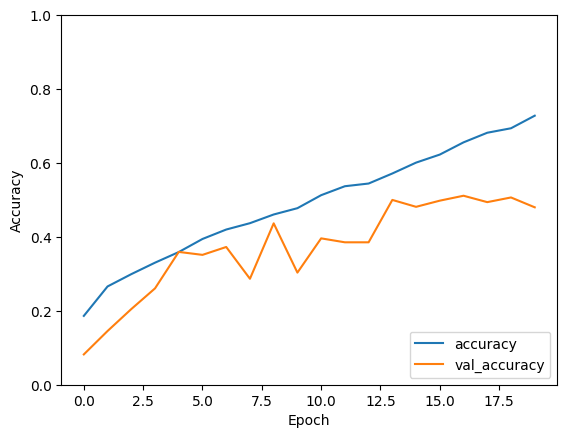

------------------------AlexNet-------------------------------
#4 optimizer = SGD, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 12s 147ms/step - loss: 3.0286 - accuracy: 0.1851 - val_loss: 3.0772 - val_accuracy: 0.0700
Epoch 2/20
67/67 [==============================] - 10s 143ms/step - loss: 2.3655 - accuracy: 0.3134 - val_loss: 3.4870 - val_accuracy: 0.0527
Epoch 3/20
67/67 [==============================] - 10s 144ms/step - loss: 2.1178 - accuracy: 0.3738 - val_loss: 3.2061 - val_accuracy: 0.0900
Epoch 4/20
67/67 [==============================] - 10s 146ms/step - loss: 1.9260 - accuracy: 0.4159 - val_loss: 2.7934 - val_accuracy: 0.1840
Epoch 5/20
67/67 [==============================] - 10s 144ms/step - loss: 1.7852 - accuracy: 0.4520 - val_loss: 2.6274 - val_accuracy: 0.2140
Epoch 6/20
67/67 [==============================] - 10s 143ms/step - loss: 1.6667 - accuracy: 0.4774 - val_loss: 1.9611 - val_accuracy: 0.3860
Epoch 7/20
67/67 [===========

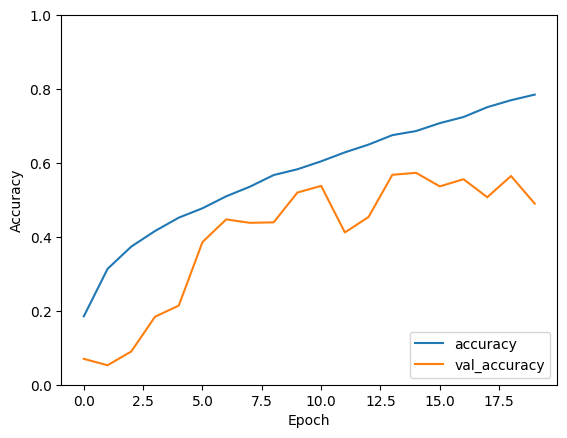

In [ ]:
print("------------------------AlexNet-------------------------------")
print ("#1 optimizer = Adam, epochs = 20, batch size = 32" )
AlexNet_1, history_AlexNet_1 = AlexNet_builder('adam',20,32)
plot(history_AlexNet_1)
print("------------------------AlexNet-------------------------------")
print ("#2 optimizer = SGD, epochs = 20, batch size = 32" )
AlexNet_2, history_AlexNet_2 = AlexNet_builder('sgd', 20, 32)
plot(history_AlexNet_2)
print("------------------------AlexNet-------------------------------")
print ("#3 optimizer = Adam, epochs = 20, batch size = 128" )
AlexNet_3, history_AlexNet_3 = AlexNet_builder('adam', 20, 128)
plot(history_AlexNet_3)
print("------------------------AlexNet-------------------------------")
print ("#4 optimizer = SGD, epochs = 20, batch size = 128" )
AlexNet_4, history_AlexNet_4 = AlexNet_builder('sgd', 20, 128)
plot(history_AlexNet_4)

**VGG**

In [ ]:
def VGG_block(num_conv, num_channels):
    block = tf.keras.models.Sequential()
    for _ in range(num_conv):
        block.add(
            tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                   padding='same', activation='relu'))
        block.add(layers.BatchNormalization())
    block.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return block

In [ ]:
def VGG_builder(optimizer, epochs, batch_size):
  conv_arch =  ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
  model = tf.keras.models.Sequential()
    # The conv part

  for (num_conv, num_channels) in conv_arch:
      model.add(VGG_block(num_conv, num_channels))
    # The fully-connected part
  model.add(
      tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(4096, activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(4096, activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(20)]))
  model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
  history= train(model, epochs, batch_size)
  return model, history

------------------------VGG-------------------------------
#1 optimizer = Adam, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 13s 25ms/step - loss: 2.8528 - accuracy: 0.1742 - val_loss: 3.3499 - val_accuracy: 0.0527
Epoch 2/20
266/266 [==============================] - 6s 23ms/step - loss: 2.5259 - accuracy: 0.2379 - val_loss: 2.5511 - val_accuracy: 0.2413
Epoch 3/20
266/266 [==============================] - 6s 24ms/step - loss: 2.3627 - accuracy: 0.2954 - val_loss: 2.9356 - val_accuracy: 0.1893
Epoch 4/20
266/266 [==============================] - 6s 23ms/step - loss: 2.2585 - accuracy: 0.3324 - val_loss: 2.6352 - val_accuracy: 0.2367
Epoch 5/20
266/266 [==============================] - 7s 24ms/step - loss: 2.1702 - accuracy: 0.3505 - val_loss: 2.3710 - val_accuracy: 0.2880
Epoch 6/20
266/266 [==============================] - 6s 23ms/step - loss: 2.0201 - accuracy: 0.3905 - val_loss: 2.2077 - val_accuracy: 0.3333
Epoch 7/20
266/266 [============

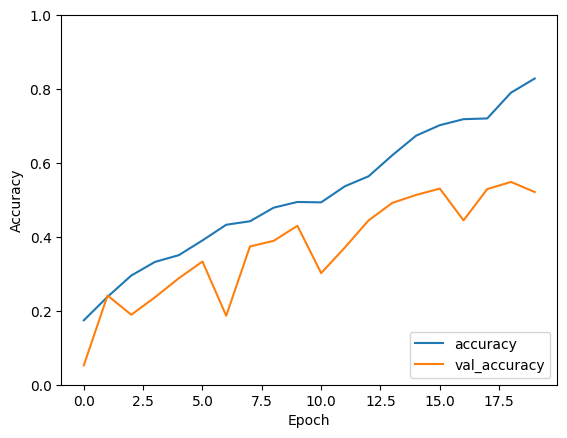

------------------------VGG-------------------------------
#2 optimizer = SGD, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 10s 23ms/step - loss: 2.6480 - accuracy: 0.2160 - val_loss: 3.3778 - val_accuracy: 0.0493
Epoch 2/20
266/266 [==============================] - 6s 22ms/step - loss: 2.1032 - accuracy: 0.3440 - val_loss: 2.1584 - val_accuracy: 0.3233
Epoch 3/20
266/266 [==============================] - 6s 22ms/step - loss: 1.8649 - accuracy: 0.4146 - val_loss: 2.0639 - val_accuracy: 0.3700
Epoch 4/20
266/266 [==============================] - 6s 22ms/step - loss: 1.6790 - accuracy: 0.4691 - val_loss: 1.9217 - val_accuracy: 0.3933
Epoch 5/20
266/266 [==============================] - 6s 22ms/step - loss: 1.4989 - accuracy: 0.5176 - val_loss: 2.1901 - val_accuracy: 0.3493
Epoch 6/20
266/266 [==============================] - 6s 24ms/step - loss: 1.3089 - accuracy: 0.5869 - val_loss: 1.9530 - val_accuracy: 0.4433
Epoch 7/20
266/266 [=============

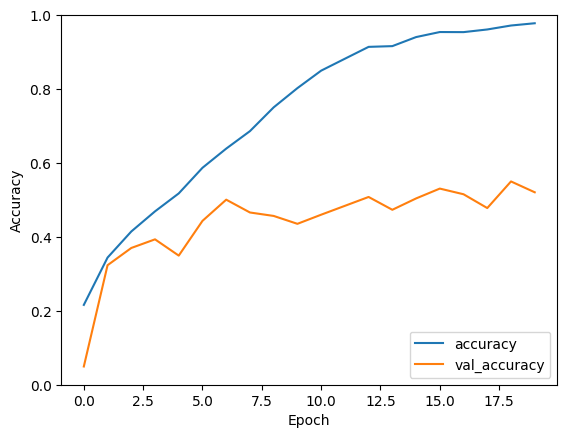

------------------------VGG-------------------------------
#3 optimizer = Adam, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 13s 64ms/step - loss: 2.9929 - accuracy: 0.1767 - val_loss: 3.3081 - val_accuracy: 0.0527
Epoch 2/20
67/67 [==============================] - 3s 43ms/step - loss: 2.3294 - accuracy: 0.2828 - val_loss: 4.1970 - val_accuracy: 0.0473
Epoch 3/20
67/67 [==============================] - 3s 41ms/step - loss: 2.1173 - accuracy: 0.3494 - val_loss: 4.1116 - val_accuracy: 0.0527
Epoch 4/20
67/67 [==============================] - 3s 41ms/step - loss: 1.9761 - accuracy: 0.3924 - val_loss: 4.2400 - val_accuracy: 0.0607
Epoch 5/20
67/67 [==============================] - 3s 41ms/step - loss: 1.7947 - accuracy: 0.4516 - val_loss: 3.7363 - val_accuracy: 0.1160
Epoch 6/20
67/67 [==============================] - 3s 42ms/step - loss: 1.6592 - accuracy: 0.4900 - val_loss: 3.1302 - val_accuracy: 0.1747
Epoch 7/20
67/67 [=========================

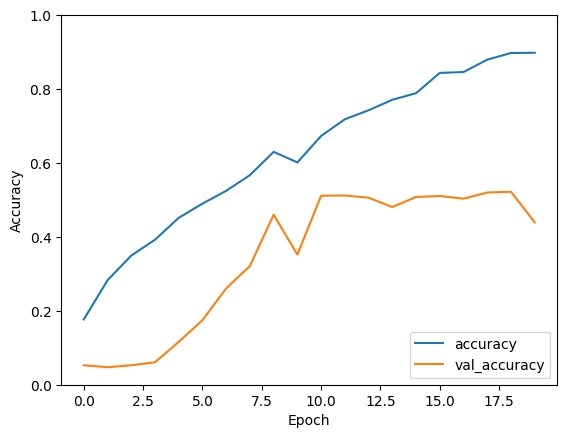

------------------------VGG-------------------------------
#4 optimizer = SGD, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 7s 46ms/step - loss: 2.8029 - accuracy: 0.1734 - val_loss: 3.0020 - val_accuracy: 0.0547
Epoch 2/20
67/67 [==============================] - 3s 41ms/step - loss: 2.2832 - accuracy: 0.2954 - val_loss: 3.0713 - val_accuracy: 0.0547
Epoch 3/20
67/67 [==============================] - 3s 40ms/step - loss: 2.0145 - accuracy: 0.3814 - val_loss: 3.2386 - val_accuracy: 0.0547
Epoch 4/20
67/67 [==============================] - 3s 44ms/step - loss: 1.8371 - accuracy: 0.4259 - val_loss: 3.4805 - val_accuracy: 0.0500
Epoch 5/20
67/67 [==============================] - 3s 43ms/step - loss: 1.6681 - accuracy: 0.4709 - val_loss: 3.4339 - val_accuracy: 0.0760
Epoch 6/20
67/67 [==============================] - 3s 41ms/step - loss: 1.5035 - accuracy: 0.5213 - val_loss: 2.8166 - val_accuracy: 0.1960
Epoch 7/20
67/67 [===========================

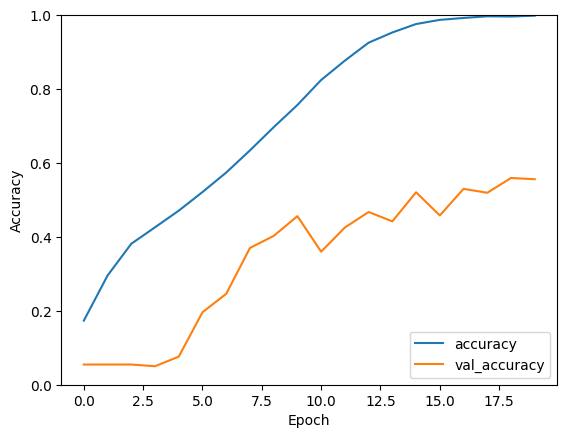

In [ ]:
print("------------------------VGG-------------------------------")
print ("#1 optimizer = Adam, epochs = 20, batch size = 32" )
VGG_1, history_VGG_1 = VGG_builder('adam',20, 32)
plot(history_VGG_1)
print("------------------------VGG-------------------------------")
print ("#2 optimizer = SGD, epochs = 20, batch size = 32" )
VGG_2, history_VGG_2 = VGG_builder('sgd', 20, 32)
plot(history_VGG_2)
print("------------------------VGG-------------------------------")
print ("#3 optimizer = Adam, epochs = 20, batch size = 128" )
VGG_3, history_VGG_3 = VGG_builder('adam', 20, 128)
plot(history_VGG_3)
print("------------------------VGG-------------------------------")
print ("#4 optimizer = SGD, epochs = 20, batch size = 128" )
VGG_4, history_VGG_4 = VGG_builder('sgd', 20, 128)
plot(history_VGG_4)

**MyCNN**

In [ ]:
def MyCNN_builder(optimizer, epochs, batch_size):
   model = tf.keras.models.Sequential()
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.AvgPool2D(pool_size=2, strides=2))
   model.add(layers.BatchNormalization())
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   model.add(layers.Dense(1000, activation='relu'))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size)

   return model, history

------------------------MyCNN-------------------------------
#1 optimizer = Adam, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 20s 57ms/step - loss: 3.0316 - accuracy: 0.1878 - val_loss: 3.0037 - val_accuracy: 0.1013
Epoch 2/20
266/266 [==============================] - 15s 56ms/step - loss: 2.4180 - accuracy: 0.2592 - val_loss: 2.4164 - val_accuracy: 0.2500
Epoch 3/20
266/266 [==============================] - 15s 56ms/step - loss: 2.2783 - accuracy: 0.2887 - val_loss: 2.7072 - val_accuracy: 0.2427
Epoch 4/20
266/266 [==============================] - 15s 56ms/step - loss: 2.1894 - accuracy: 0.3234 - val_loss: 2.5314 - val_accuracy: 0.2593
Epoch 5/20
266/266 [==============================] - 14s 54ms/step - loss: 2.0768 - accuracy: 0.3596 - val_loss: 2.5164 - val_accuracy: 0.2527
Epoch 6/20
266/266 [==============================] - 15s 56ms/step - loss: 1.9639 - accuracy: 0.3946 - val_loss: 2.5086 - val_accuracy: 0.2787
Epoch 7/20
266/266 [=====

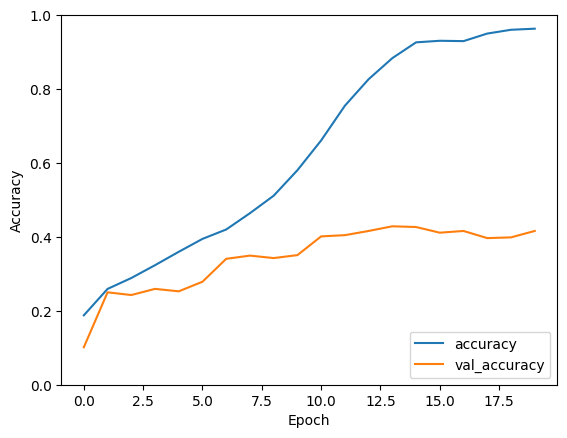

------------------------MyCNN-------------------------------
#2 optimizer = SGD, epochs = 20, batch size = 32
Epoch 1/20
266/266 [==============================] - 16s 56ms/step - loss: 2.3830 - accuracy: 0.2922 - val_loss: 4.0703 - val_accuracy: 0.0527
Epoch 2/20
266/266 [==============================] - 14s 53ms/step - loss: 1.7412 - accuracy: 0.4573 - val_loss: 2.7136 - val_accuracy: 0.2213
Epoch 3/20
266/266 [==============================] - 14s 53ms/step - loss: 1.3182 - accuracy: 0.5869 - val_loss: 2.0574 - val_accuracy: 0.4020
Epoch 4/20
266/266 [==============================] - 15s 56ms/step - loss: 0.9230 - accuracy: 0.7218 - val_loss: 1.8874 - val_accuracy: 0.4473
Epoch 5/20
266/266 [==============================] - 15s 55ms/step - loss: 0.5796 - accuracy: 0.8496 - val_loss: 1.8714 - val_accuracy: 0.4667
Epoch 6/20
266/266 [==============================] - 14s 53ms/step - loss: 0.3070 - accuracy: 0.9376 - val_loss: 1.9250 - val_accuracy: 0.4607
Epoch 7/20
266/266 [======

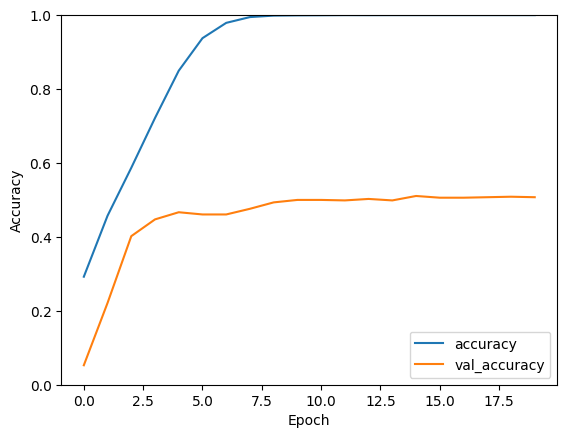

------------------------MyCNN-------------------------------
#3 optimizer = Adam, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 29s 251ms/step - loss: 3.4514 - accuracy: 0.2179 - val_loss: 4.3621 - val_accuracy: 0.0487
Epoch 2/20
67/67 [==============================] - 11s 163ms/step - loss: 2.2590 - accuracy: 0.3164 - val_loss: 3.3110 - val_accuracy: 0.0533
Epoch 3/20
67/67 [==============================] - 11s 162ms/step - loss: 2.0503 - accuracy: 0.3709 - val_loss: 3.0174 - val_accuracy: 0.0673
Epoch 4/20
67/67 [==============================] - 11s 159ms/step - loss: 1.8721 - accuracy: 0.4188 - val_loss: 3.0332 - val_accuracy: 0.1153
Epoch 5/20
67/67 [==============================] - 11s 161ms/step - loss: 1.6971 - accuracy: 0.4674 - val_loss: 2.8160 - val_accuracy: 0.1853
Epoch 6/20
67/67 [==============================] - 11s 161ms/step - loss: 1.5238 - accuracy: 0.5148 - val_loss: 3.3707 - val_accuracy: 0.1720
Epoch 7/20
67/67 [============

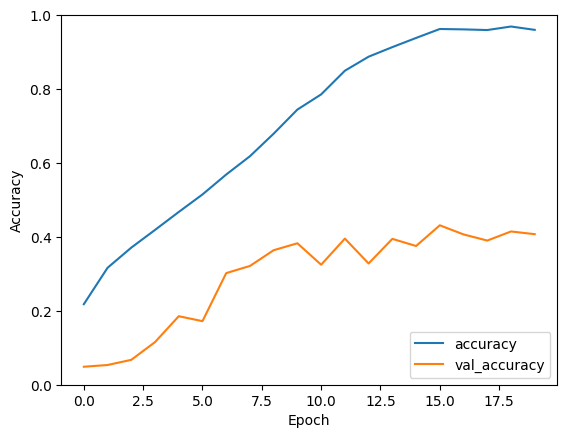

------------------------MyCNN-------------------------------
#4 optimizer = SGD, epochs = 20, batch size = 128
Epoch 1/20
67/67 [==============================] - 12s 159ms/step - loss: 2.3643 - accuracy: 0.2900 - val_loss: 3.0917 - val_accuracy: 0.0553
Epoch 2/20
67/67 [==============================] - 11s 164ms/step - loss: 1.7898 - accuracy: 0.4473 - val_loss: 3.5095 - val_accuracy: 0.0540
Epoch 3/20
67/67 [==============================] - 11s 169ms/step - loss: 1.4357 - accuracy: 0.5666 - val_loss: 3.5842 - val_accuracy: 0.0700
Epoch 4/20
67/67 [==============================] - 11s 170ms/step - loss: 1.1554 - accuracy: 0.6626 - val_loss: 3.7496 - val_accuracy: 0.0513
Epoch 5/20
67/67 [==============================] - 11s 166ms/step - loss: 0.9022 - accuracy: 0.7575 - val_loss: 4.0773 - val_accuracy: 0.0580
Epoch 6/20
67/67 [==============================] - 11s 161ms/step - loss: 0.6937 - accuracy: 0.8368 - val_loss: 3.1596 - val_accuracy: 0.1627
Epoch 7/20
67/67 [=============

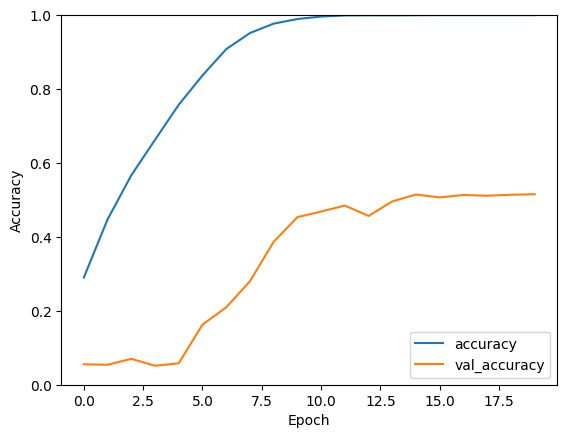

In [ ]:
print("------------------------MyCNN-------------------------------")
print ("#1 optimizer = Adam, epochs = 20, batch size = 32" )
MyCNN_1, history_MyCNN_1 = MyCNN_builder('adam', 20,32)
plot(history_MyCNN_1)
print("------------------------MyCNN-------------------------------")
print ("#2 optimizer = SGD, epochs = 20, batch size = 32" )
MyCNN_2, history_MyCNN_2 = MyCNN_builder('sgd', 20, 32)
plot(history_MyCNN_2)
print("------------------------MyCNN-------------------------------")
print ("#3 optimizer = Adam, epochs = 20, batch size = 128" )
MyCNN_3, history_MyCNN_3 = MyCNN_builder('adam', 20, 128)
plot(history_MyCNN_3)
print("------------------------MyCNN-------------------------------")
print ("#4 optimizer = SGD, epochs = 20, batch size = 128" )
MyCNN_4, history_MyCNN_4 = MyCNN_builder('sgd', 20, 128)
plot(history_MyCNN_4)

***Σχολιασμός Αποτελεσμάτων:***
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου

Το μεγαλύτερο πλήθος δεδομένων οδηγεί σε μεγαλύτερη ακρίβεια, καθώς το μοντέλο λαμβάνει περισσότερες πληροφορίες ανά κλάση.

 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)

Κάναμε χρήση των αλγορίθμων βελτιστοποίησης Adam και SGD.


**LeNet**

Ο αλγόριθμος βελτιστοποίησης Adam παρέχει μεγαλύτερη ακρίβεια από τον αλγόριθμο βελτιστοποίησης SGD, καθώς ο SGD δε βελτιώνει τα αποτελέσματα από κάποιο σημείο και μετά.

**AlexNet**

Δεν παρατηρείται μεγάλη διαφορά μεταξύ των αλγορίθμων βελτιστοποίησης Adam και SGD, καθώς είναι εξίσου αποδοτικοί.

**VGG**

Τα μοντέλα φτάνουν σε παρόμοια ακρίβεια με τη διαφορά ότι ο SGD φτάνει πιο γρηγόρα και πιο σταθερά στη βέλτιστη ακρίβεια.

**MyCNN**

Τα μοντέλα φτάνουν σε παρόμοια ακρίβεια με τη διαφορά ότι ο SGD φτάνει πιο γρηγόρα και πιο σταθερά στη βέλτιστη ακρίβεια.

 - Επίδραση του μεγέθους δέσμης (batch size)

 Παρατηρούμε ότι το μικρό μέγεθος δέσμης παρουσιάζεται, για όλα τα μοντέλα, καλύτερη ακρίβεια.
 Μελετάμε την επίδραση του batch size στην ακρίβεια με μία μικρή τιμή και μία μεγάλη τιμή.

In [ ]:
test_loss ={}
test_acc ={}
test_loss["LeNet"], test_acc["LeNet"] = LeNet_1.evaluate(x_test,  y_test, verbose=2)
test_loss["AlexNet"], test_acc["AlexNet"] = AlexNet_2.evaluate(x_test,  y_test, verbose=2)
test_loss["VGG"], test_acc["VGG"] = VGG_2.evaluate(x_test,  y_test, verbose=2)
test_loss["MyCNN"], test_acc["MyCNN"] = MyCNN_2.evaluate(x_test,  y_test, verbose=2)

test_loss = dict(sorted(test_loss.items(),key=lambda x:x[1],reverse = False))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("---------------")
print("Losses: ")
[print(key,':',value) for key, value in test_loss.items()]

print("---------------")
print("Accuracies: ")
[print(key,':',value) for key, value in test_acc.items()]
print("---------------")


63/63 - 0s - loss: 1.8433 - accuracy: 0.4430 - 202ms/epoch - 3ms/step
63/63 - 1s - loss: 1.3422 - accuracy: 0.6480 - 1s/epoch - 18ms/step
63/63 - 1s - loss: 2.4121 - accuracy: 0.5545 - 587ms/epoch - 9ms/step
63/63 - 1s - loss: 1.9328 - accuracy: 0.5290 - 1s/epoch - 21ms/step
---------------
Losses: 
AlexNet : 1.3422179222106934
LeNet : 1.8432731628417969
MyCNN : 1.9327709674835205
VGG : 2.4120993614196777
---------------
Accuracies: 
AlexNet : 0.6480000019073486
VGG : 0.5544999837875366
MyCNN : 0.5289999842643738
LeNet : 0.4429999887943268
---------------



### Ερώτημα 2
---
##### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
##### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1,
    )
]

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=x_train.shape[1:]),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
def MyCNN_Overfitting_Builder(optimizer, epochs,  batch_size, dropout = False, augmentation = False, callbacks = None):
   model = tf.keras.models.Sequential()
   if(augmentation): model.add(data_augmentation)
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=300, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.BatchNormalization())
   model.add(layers.Conv2D(filters=200, kernel_size=5, activation='relu'))
   model.add(layers.AvgPool2D(pool_size=2, strides=2))
   model.add(layers.BatchNormalization())
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(1000, activation='relu'))
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size, callbacks)

   return model, history

------------------------Overfitting-------------------------------
#1 Early Stopping
Epoch 1/20
266/266 [==============================] - 29s 59ms/step - loss: 2.4128 - accuracy: 0.2828 - val_loss: 3.6112 - val_accuracy: 0.0747
Epoch 2/20
266/266 [==============================] - 14s 53ms/step - loss: 1.7578 - accuracy: 0.4584 - val_loss: 2.5608 - val_accuracy: 0.2593
Epoch 3/20
266/266 [==============================] - 14s 54ms/step - loss: 1.3239 - accuracy: 0.5865 - val_loss: 2.1792 - val_accuracy: 0.3533
Epoch 4/20
266/266 [==============================] - 14s 53ms/step - loss: 0.9324 - accuracy: 0.7158 - val_loss: 1.9587 - val_accuracy: 0.4227
Epoch 5/20
266/266 [==============================] - 15s 57ms/step - loss: 0.5829 - accuracy: 0.8455 - val_loss: 2.0757 - val_accuracy: 0.4107
Epoch 6/20
266/266 [==============================] - 14s 54ms/step - loss: 0.3182 - accuracy: 0.9376 - val_loss: 1.9869 - val_accuracy: 0.4447
Epoch 7/20
266/266 [==============================]

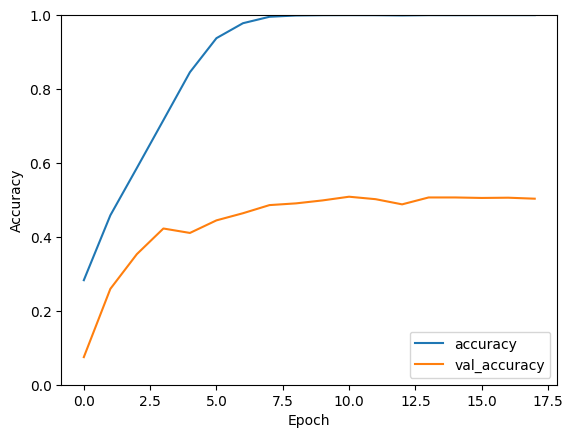

------------------------Overfitting-------------------------------*
#2 Dropout
Epoch 1/20
266/266 [==============================] - 17s 56ms/step - loss: 2.4794 - accuracy: 0.2684 - val_loss: 4.0360 - val_accuracy: 0.0553
Epoch 2/20
266/266 [==============================] - 14s 53ms/step - loss: 1.8881 - accuracy: 0.4228 - val_loss: 2.3055 - val_accuracy: 0.3040
Epoch 3/20
266/266 [==============================] - 14s 54ms/step - loss: 1.5153 - accuracy: 0.5225 - val_loss: 2.1903 - val_accuracy: 0.3760
Epoch 4/20
266/266 [==============================] - 14s 53ms/step - loss: 1.1923 - accuracy: 0.6235 - val_loss: 1.9682 - val_accuracy: 0.4233
Epoch 5/20
266/266 [==============================] - 15s 55ms/step - loss: 0.9108 - accuracy: 0.7260 - val_loss: 2.0181 - val_accuracy: 0.4107
Epoch 6/20
266/266 [==============================] - 15s 55ms/step - loss: 0.6303 - accuracy: 0.8109 - val_loss: 1.9228 - val_accuracy: 0.4507
Epoch 7/20
266/266 [==============================] - 14s

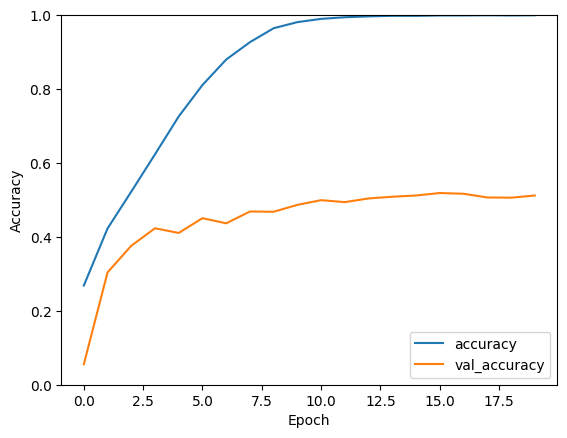

------------------------Overfitting-------------------------------
#3 Data Augmentation
Epoch 1/20
266/266 [==============================] - 16s 55ms/step - loss: 2.4808 - accuracy: 0.2602 - val_loss: 3.5915 - val_accuracy: 0.0840
Epoch 2/20
266/266 [==============================] - 15s 58ms/step - loss: 2.0451 - accuracy: 0.3701 - val_loss: 2.4382 - val_accuracy: 0.2660
Epoch 3/20
266/266 [==============================] - 15s 58ms/step - loss: 1.8609 - accuracy: 0.4166 - val_loss: 1.9797 - val_accuracy: 0.3900
Epoch 4/20
266/266 [==============================] - 14s 54ms/step - loss: 1.7032 - accuracy: 0.4654 - val_loss: 2.0965 - val_accuracy: 0.3700
Epoch 5/20
266/266 [==============================] - 14s 53ms/step - loss: 1.5742 - accuracy: 0.4974 - val_loss: 2.1888 - val_accuracy: 0.3533
Epoch 6/20
266/266 [==============================] - 14s 53ms/step - loss: 1.4703 - accuracy: 0.5302 - val_loss: 2.1723 - val_accuracy: 0.3700
Epoch 7/20
266/266 [============================

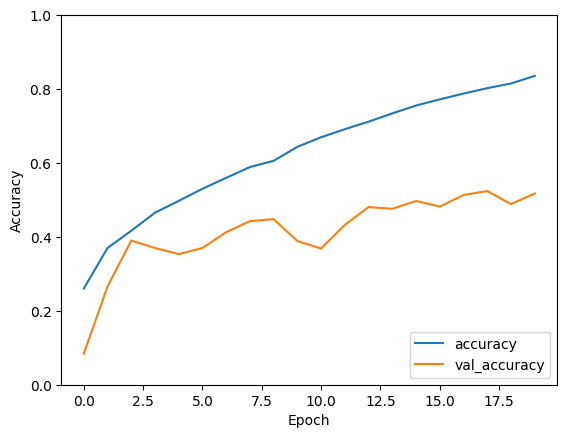

In [ ]:
print("------------------------Overfitting-------------------------------")
print ("#1 Early Stopping")
MyCNN_O1, history_MyCNN_O1 = MyCNN_Overfitting_Builder("sgd",20,32, callbacks = callbacks)
plot(history_MyCNN_O1)
print("------------------------Overfitting-------------------------------*")
print ("#2 Dropout" )
MyCNN_O2, history_MyCNN_O2 = MyCNN_Overfitting_Builder("sgd",20,32, dropout = True)
plot(history_MyCNN_O2)
print("------------------------Overfitting-------------------------------")
print ("#3 Data Augmentation" )
MyCNN_O3, history_MyCNN_O3 = MyCNN_Overfitting_Builder("sgd",20,32, augmentation = True)
plot(history_MyCNN_O3)

------------------------Overfitting-------------------------------
#4 Early Stopping & Dropout
Epoch 1/20
266/266 [==============================] - 17s 56ms/step - loss: 2.4867 - accuracy: 0.2707 - val_loss: 4.0364 - val_accuracy: 0.0573
Epoch 2/20
266/266 [==============================] - 15s 55ms/step - loss: 1.8831 - accuracy: 0.4204 - val_loss: 2.5013 - val_accuracy: 0.2633
Epoch 3/20
266/266 [==============================] - 15s 58ms/step - loss: 1.5106 - accuracy: 0.5286 - val_loss: 1.9803 - val_accuracy: 0.4240
Epoch 4/20
266/266 [==============================] - 14s 54ms/step - loss: 1.1894 - accuracy: 0.6307 - val_loss: 2.3846 - val_accuracy: 0.3540
Epoch 5/20
266/266 [==============================] - 15s 55ms/step - loss: 0.8948 - accuracy: 0.7227 - val_loss: 2.2578 - val_accuracy: 0.3967
Epoch 6/20
266/266 [==============================] - 15s 55ms/step - loss: 0.6426 - accuracy: 0.8071 - val_loss: 2.2752 - val_accuracy: 0.3900
Epoch 7/20
266/266 [=====================

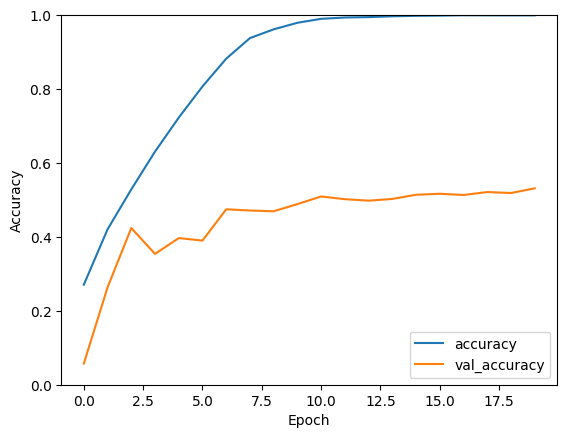

------------------------Overfitting-------------------------------
#5 Dropout & Data Augmentation
Epoch 1/20
266/266 [==============================] - 17s 57ms/step - loss: 2.5769 - accuracy: 0.2411 - val_loss: 3.8167 - val_accuracy: 0.0853
Epoch 2/20
266/266 [==============================] - 15s 58ms/step - loss: 2.1439 - accuracy: 0.3462 - val_loss: 2.5022 - val_accuracy: 0.2453
Epoch 3/20
266/266 [==============================] - 15s 56ms/step - loss: 1.9607 - accuracy: 0.3967 - val_loss: 2.3159 - val_accuracy: 0.2927
Epoch 4/20
266/266 [==============================] - 15s 56ms/step - loss: 1.8175 - accuracy: 0.4334 - val_loss: 2.0085 - val_accuracy: 0.3827
Epoch 5/20
266/266 [==============================] - 14s 54ms/step - loss: 1.7128 - accuracy: 0.4582 - val_loss: 1.8910 - val_accuracy: 0.4147
Epoch 6/20
266/266 [==============================] - 15s 56ms/step - loss: 1.6067 - accuracy: 0.4959 - val_loss: 1.9944 - val_accuracy: 0.3980
Epoch 7/20
266/266 [==================

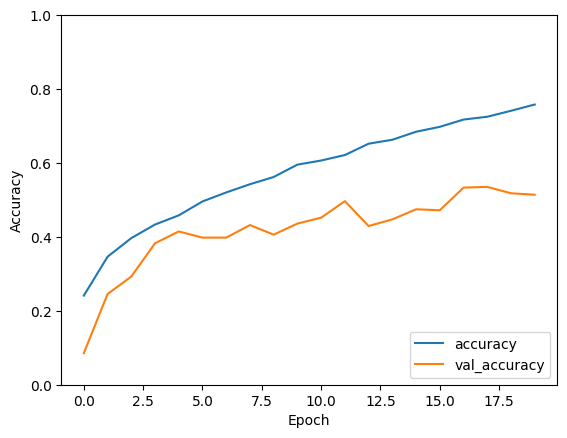

In [ ]:
print("------------------------Overfitting-------------------------------")
print ("#4 Early Stopping & Dropout")
MyCNN_O4, history_MyCNN_O4 = MyCNN_Overfitting_Builder("sgd",20,32, dropout = True, callbacks = callbacks)
plot(history_MyCNN_O4)
print("------------------------Overfitting-------------------------------")
print ("#5 Dropout & Data Augmentation" )
MyCNN_O5, history_MyCNN_O5 = MyCNN_Overfitting_Builder("sgd",20,32, dropout = True, augmentation = True)
plot(history_MyCNN_O5)


------------------------Overfitting-------------------------------
#6 Early Stopping & Data Augmentation
Epoch 1/20
266/266 [==============================] - 16s 55ms/step - loss: 2.4887 - accuracy: 0.2693 - val_loss: 3.6752 - val_accuracy: 0.0987
Epoch 2/20
266/266 [==============================] - 15s 58ms/step - loss: 2.0349 - accuracy: 0.3742 - val_loss: 2.4121 - val_accuracy: 0.2780
Epoch 3/20
266/266 [==============================] - 15s 58ms/step - loss: 1.8484 - accuracy: 0.4194 - val_loss: 1.9875 - val_accuracy: 0.3860
Epoch 4/20
266/266 [==============================] - 15s 56ms/step - loss: 1.6957 - accuracy: 0.4653 - val_loss: 2.0843 - val_accuracy: 0.3653
Epoch 5/20
266/266 [==============================] - 15s 56ms/step - loss: 1.5735 - accuracy: 0.5025 - val_loss: 2.2371 - val_accuracy: 0.3507
Epoch 6/20
266/266 [==============================] - 14s 54ms/step - loss: 1.4615 - accuracy: 0.5369 - val_loss: 1.9966 - val_accuracy: 0.4067
Epoch 7/20
266/266 [===========

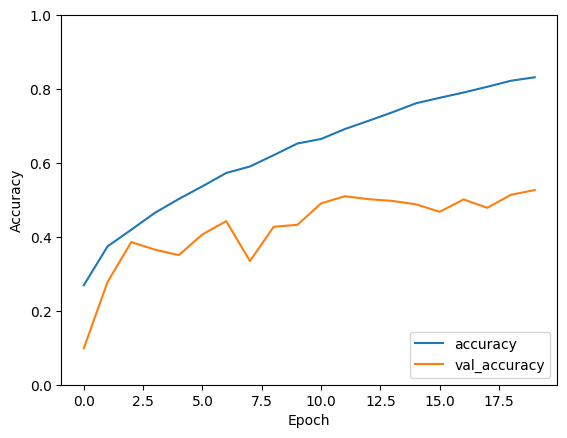

------------------------Overfitting-------------------------------
#7 Early Stopping & Dropout &  Data Augmentation
Epoch 1/20
266/266 [==============================] - 17s 57ms/step - loss: 2.5676 - accuracy: 0.2464 - val_loss: 3.4503 - val_accuracy: 0.0560
Epoch 2/20
266/266 [==============================] - 15s 56ms/step - loss: 2.1252 - accuracy: 0.3458 - val_loss: 2.4226 - val_accuracy: 0.2647
Epoch 3/20
266/266 [==============================] - 15s 56ms/step - loss: 1.9382 - accuracy: 0.3958 - val_loss: 2.2292 - val_accuracy: 0.3153
Epoch 4/20
266/266 [==============================] - 14s 54ms/step - loss: 1.8095 - accuracy: 0.4302 - val_loss: 2.1879 - val_accuracy: 0.3580
Epoch 5/20
266/266 [==============================] - 15s 56ms/step - loss: 1.7133 - accuracy: 0.4698 - val_loss: 2.1347 - val_accuracy: 0.3400
Epoch 6/20
266/266 [==============================] - 14s 53ms/step - loss: 1.6045 - accuracy: 0.4922 - val_loss: 2.1675 - val_accuracy: 0.3327
Epoch 7/20
266/266 [

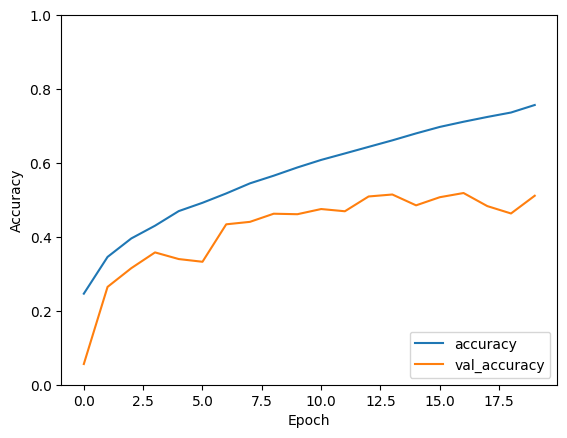

In [ ]:
print("------------------------Overfitting-------------------------------")
print ("#6 Early Stopping & Data Augmentation" )
MyCNN_O6, history_MyCNN_O6 = MyCNN_Overfitting_Builder("sgd",20,32, augmentation = True, callbacks = callbacks)
plot(history_MyCNN_O6)
print("------------------------Overfitting-------------------------------")
print ("#7 Early Stopping & Dropout &  Data Augmentation" )
MyCNN_O7, history_MyCNN_O7 = MyCNN_Overfitting_Builder("sgd",20,32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN_O7)


In [ ]:
test_loss ={}
test_acc ={}
test_loss["No OverFitting Check"], test_acc["No OverFitting Check"] = MyCNN_2.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping"], test_acc["Early Stopping"] = MyCNN_O1.evaluate(x_test,  y_test, verbose=2)
test_loss["Dropout"], test_acc["Dropout"] = MyCNN_O2.evaluate(x_test,  y_test, verbose=2)
test_loss["Data Augmentation"], test_acc["Data Augmentation"] = MyCNN_O3.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping & Dropout"], test_acc["Early Stopping & Dropout"] = MyCNN_O4.evaluate(x_test,  y_test, verbose=2)
test_loss["Dropout & Data Augmentation"], test_acc["Dropout & Data Augmentation"] = MyCNN_O5.evaluate(x_test,  y_test, verbose=2)
test_loss["Early Stopping & Data Augmentation"], test_acc["Early Stopping & Data Augmentation"] = MyCNN_O6.evaluate(x_test,  y_test, verbose=2)
test_loss["All Techniques"], test_acc["All Techniques"] = MyCNN_O7.evaluate(x_test,  y_test, verbose=2)

test_loss = dict(sorted(test_loss.items(),key=lambda x:x[1],reverse = False))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("---------------")
print("Losses: ")
[print(key,':',value) for key, value in test_loss.items()]
# print(test_loss)
print("---------------")
print("Accuracies: ")
[print(key,':',value) for key, value in test_acc.items()]
print("---------------")


63/63 - 1s - loss: 1.9013 - accuracy: 0.5280 - 1s/epoch - 24ms/step
63/63 - 1s - loss: 1.9318 - accuracy: 0.5275 - 955ms/epoch - 15ms/step
63/63 - 1s - loss: 2.0527 - accuracy: 0.5350 - 930ms/epoch - 15ms/step
63/63 - 1s - loss: 1.6632 - accuracy: 0.5530 - 920ms/epoch - 15ms/step
63/63 - 1s - loss: 1.9833 - accuracy: 0.5335 - 945ms/epoch - 15ms/step
63/63 - 1s - loss: 1.6751 - accuracy: 0.5490 - 924ms/epoch - 15ms/step
63/63 - 1s - loss: 1.6275 - accuracy: 0.5665 - 917ms/epoch - 15ms/step
63/63 - 1s - loss: 1.5704 - accuracy: 0.5485 - 926ms/epoch - 15ms/step
---------------
Losses: 
All Techniques : 1.5703908205032349
Early Stopping & Data Augmentation : 1.627474308013916
Data Augmentation : 1.663179874420166
Dropout & Data Augmentation : 1.6750918626785278
No OverFitting Check : 1.9013245105743408
Early Stopping : 1.931821346282959
Early Stopping & Dropout : 1.9833474159240723
Dropout : 2.052703380584717
---------------
Accuracies: 
Early Stopping & Data Augmentation : 0.5665000081062

***Σχολιασμός Αποτελεσμάτων:***

Παρατηρούμε ότι όλες οι μέθοδοι με τους κατάλληλους συνδυασμούς μειώνουν τις  απώλειες (loss), ενώ αρκετές παρουσιάζουν και μεγαλύτερη ακρίβεια. Η χρήση τεχνικών αντιμετώπισης του Overfitting, λοιπόν, είναι αρκετά χρήσιμη για την βελτίωση του μοντέλου.


### Ερώτημα 3
---
##### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

##### Βήμα 1: Μεταφορά γνώσης

**VGG19**

In [ ]:
def MyCNN19_Builder(Vgg19, optimizer,epochs, batch_size, augmentation = False, dropout = False, callbacks = None):
   model =  models.Sequential()
   if(augmentation): model.add(data_augmentation)
   model.add(Vgg19)
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(1000, activation='relu'))
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size, callbacks)
   return model,history


In [ ]:
def activate_vgg19(percentage):
  Vgg19 = tf.keras.applications.vgg19.VGG19(
      include_top=False,
      input_shape=x_train.shape[1:],
      pooling=None,
      classifier_activation= 'softmax'
    )
  Vgg19.trainable = True
  numoflayers = len(Vgg19.layers)
  numoftrainable = round(numoflayers*percentage)
  for layer in Vgg19.layers[:numoflayers-numoftrainable]:
    layer.trainable = False
  return Vgg19

Epoch 1/20
266/266 [==============================] - 6s 17ms/step - loss: 2.6512 - accuracy: 0.2109 - val_loss: 2.3550 - val_accuracy: 0.3093
Epoch 2/20
266/266 [==============================] - 4s 14ms/step - loss: 2.2366 - accuracy: 0.3106 - val_loss: 2.1977 - val_accuracy: 0.3127
Epoch 3/20
266/266 [==============================] - 4s 14ms/step - loss: 2.0879 - accuracy: 0.3464 - val_loss: 2.0992 - val_accuracy: 0.3253
Epoch 4/20
266/266 [==============================] - 4s 15ms/step - loss: 2.0073 - accuracy: 0.3764 - val_loss: 2.0086 - val_accuracy: 0.3713
Epoch 5/20
266/266 [==============================] - 4s 15ms/step - loss: 1.9487 - accuracy: 0.3868 - val_loss: 2.0027 - val_accuracy: 0.3820
Epoch 6/20
266/266 [==============================] - 4s 14ms/step - loss: 1.9175 - accuracy: 0.3979 - val_loss: 2.0050 - val_accuracy: 0.3780
Epoch 7/20
266/266 [==============================] - 4s 14ms/step - loss: 1.8751 - accuracy: 0.4126 - val_loss: 1.9124 - val_accuracy: 0.3880

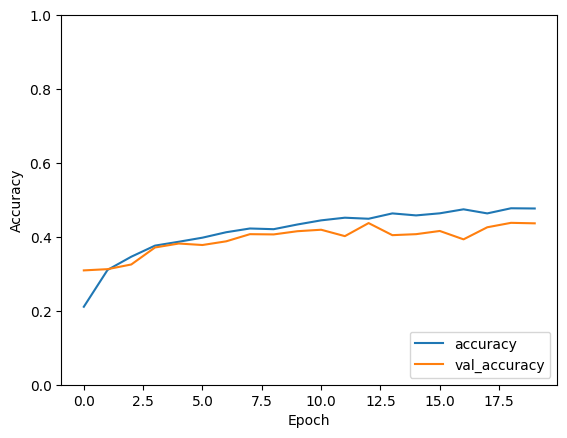

In [ ]:
Vgg19_0 = activate_vgg19(0)
MyCNN19_0,history_MyCNN19_0 =  MyCNN19_Builder(Vgg19_0,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN19_0)

Epoch 1/20
266/266 [==============================] - 9s 22ms/step - loss: 2.2508 - accuracy: 0.2969 - val_loss: 1.8809 - val_accuracy: 0.3913
Epoch 2/20
266/266 [==============================] - 5s 20ms/step - loss: 1.8043 - accuracy: 0.4294 - val_loss: 1.7988 - val_accuracy: 0.4447
Epoch 3/20
266/266 [==============================] - 5s 20ms/step - loss: 1.6642 - accuracy: 0.4725 - val_loss: 1.6237 - val_accuracy: 0.4847
Epoch 4/20
266/266 [==============================] - 5s 20ms/step - loss: 1.5645 - accuracy: 0.5013 - val_loss: 1.6488 - val_accuracy: 0.4820
Epoch 5/20
266/266 [==============================] - 5s 21ms/step - loss: 1.5026 - accuracy: 0.5154 - val_loss: 1.5620 - val_accuracy: 0.4953
Epoch 6/20
266/266 [==============================] - 5s 20ms/step - loss: 1.4458 - accuracy: 0.5340 - val_loss: 1.5813 - val_accuracy: 0.5100
Epoch 7/20
266/266 [==============================] - 5s 20ms/step - loss: 1.3764 - accuracy: 0.5551 - val_loss: 1.4981 - val_accuracy: 0.5220

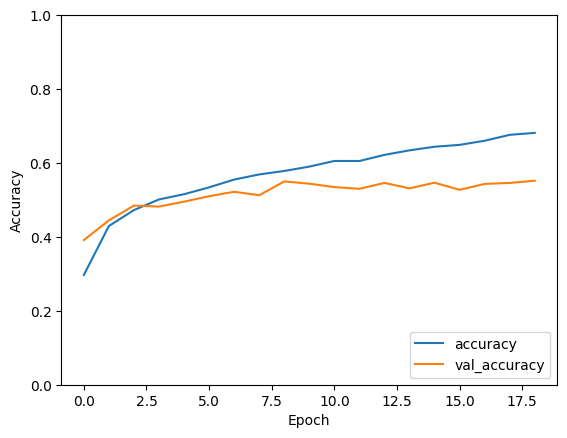

In [ ]:
Vgg19_20 = activate_vgg19(0.2)
MyCNN19_20,history_MyCNN19_20 =  MyCNN19_Builder(Vgg19_20,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN19_20)

Epoch 1/20
266/266 [==============================] - 13s 36ms/step - loss: 2.2530 - accuracy: 0.3034 - val_loss: 1.8007 - val_accuracy: 0.4467
Epoch 2/20
266/266 [==============================] - 8s 32ms/step - loss: 1.7273 - accuracy: 0.4531 - val_loss: 1.9259 - val_accuracy: 0.4300
Epoch 3/20
266/266 [==============================] - 8s 31ms/step - loss: 1.5191 - accuracy: 0.5164 - val_loss: 1.5586 - val_accuracy: 0.5060
Epoch 4/20
266/266 [==============================] - 9s 33ms/step - loss: 1.4055 - accuracy: 0.5529 - val_loss: 1.5144 - val_accuracy: 0.5293
Epoch 5/20
266/266 [==============================] - 9s 32ms/step - loss: 1.2714 - accuracy: 0.5929 - val_loss: 1.5625 - val_accuracy: 0.5187
Epoch 6/20
266/266 [==============================] - 8s 31ms/step - loss: 1.2114 - accuracy: 0.6085 - val_loss: 1.7701 - val_accuracy: 0.4693
Epoch 7/20
266/266 [==============================] - 9s 32ms/step - loss: 1.1372 - accuracy: 0.6295 - val_loss: 1.4638 - val_accuracy: 0.535

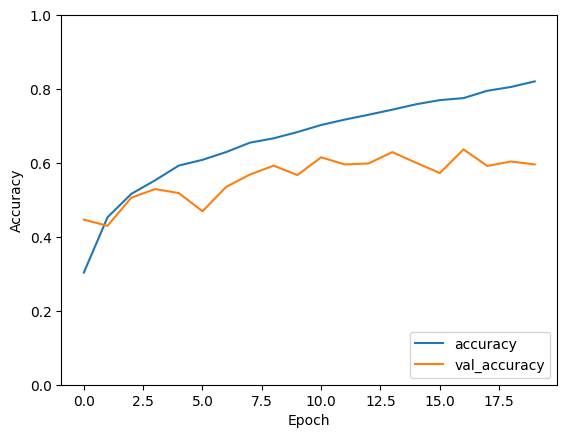

In [ ]:
Vgg19_50 = activate_vgg19(0.5)
MyCNN19_50,history_MyCNN19_50 =  MyCNN19_Builder(Vgg19_50,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNN19_50)

In [ ]:
val_acc ={}
test_acc ={}
_, test_acc["0%"] = MyCNN19_0.evaluate(x_test,  y_test, verbose=2)
_, test_acc["20%"] = MyCNN19_20.evaluate(x_test,  y_test, verbose=2)
_, test_acc["50%"] = MyCNN19_50.evaluate(x_test,  y_test, verbose=2)
val_acc["0%"] = history_MyCNN19_0.history['val_accuracy'][-1]
val_acc["20%"] = history_MyCNN19_20.history['val_accuracy'][-1]
val_acc["50%"] = history_MyCNN19_50.history['val_accuracy'][-1]


val_acc = dict(sorted(val_acc.items(),key=lambda x:x[1],reverse = True))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("---------------")
print("Val Accuracy : ")
[print(key,':',value) for key, value in val_acc.items()]
# print(test_loss)
print("---------------")
print("Test Accuracy : ")
[print(key,':',value) for key, value in test_acc.items()]
print("---------------")

63/63 - 1s - loss: 1.6425 - accuracy: 0.4800 - 701ms/epoch - 11ms/step
63/63 - 1s - loss: 1.3185 - accuracy: 0.5930 - 588ms/epoch - 9ms/step
63/63 - 1s - loss: 1.2903 - accuracy: 0.6495 - 590ms/epoch - 9ms/step
---------------
Val Accuracy : 
50% : 0.5960000157356262
20% : 0.5519999861717224
0% : 0.43666666746139526
---------------
Test Accuracy : 
50% : 0.6495000123977661
20% : 0.5929999947547913
0% : 0.47999998927116394
---------------


**EfficientNetB0**

In [ ]:
def MyCNNB0_Builder(EfficientNetB0, optimizer, epochs, batch_size, augmentation=False, dropout=False, callbacks=None, input_data=None):
   model =  models.Sequential()
   if(augmentation): model.add(data_augmentation)
   model.add(EfficientNetB0)
   model.add(layers.Flatten())
   model.add(layers.Dense(2000, activation='relu'))  
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(1000, activation='relu'))
   if (dropout) : model.add(layers.Dropout(0.1))
   model.add(layers.Dense(20))
   model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
   history= train(model, epochs, batch_size, callbacks)
   return model,history


In [ ]:
def activate_efficientnetb0(percentage):
    EfficientNetB0 = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    input_shape=x_train.shape[1:],
    pooling=None,
    classes=20,
    classifier_activation= 'softmax'
    )

    EfficientNetB0.trainable = True
    num_of_layers = len(EfficientNetB0.layers)
    num_of_trainable = round(num_of_layers * percentage)
    for layer in EfficientNetB0.layers[:num_of_layers - num_of_trainable]:
        layer.trainable = False
    return EfficientNetB0


Epoch 1/20
266/266 [==============================] - 12s 21ms/step - loss: 3.0070 - accuracy: 0.0479 - val_loss: 3.0052 - val_accuracy: 0.0460
Epoch 2/20
266/266 [==============================] - 3s 12ms/step - loss: 3.0047 - accuracy: 0.0493 - val_loss: 3.0064 - val_accuracy: 0.0680
Epoch 3/20
266/266 [==============================] - 3s 11ms/step - loss: 3.0037 - accuracy: 0.0453 - val_loss: 3.0071 - val_accuracy: 0.0427
Epoch 4/20
266/266 [==============================] - 3s 12ms/step - loss: 3.0038 - accuracy: 0.0448 - val_loss: 2.9987 - val_accuracy: 0.0453
Epoch 5/20
266/266 [==============================] - 4s 13ms/step - loss: 3.0019 - accuracy: 0.0502 - val_loss: 2.9996 - val_accuracy: 0.0493
Epoch 6/20
266/266 [==============================] - 3s 12ms/step - loss: 2.9988 - accuracy: 0.0549 - val_loss: 2.9995 - val_accuracy: 0.0527
Epoch 7/20
266/266 [==============================] - 4s 13ms/step - loss: 2.9998 - accuracy: 0.0473 - val_loss: 2.9994 - val_accuracy: 0.040

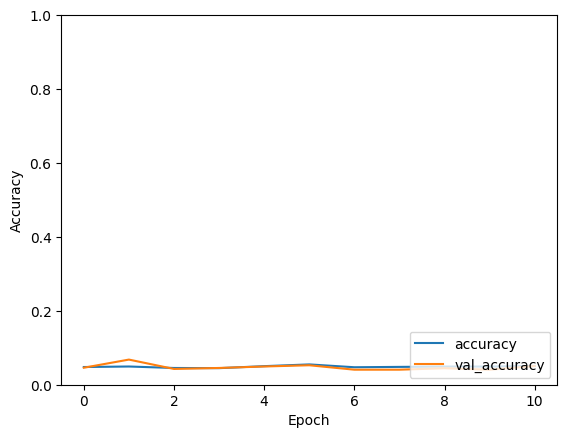

In [ ]:
ENB0_0 = activate_efficientnetb0(0)
MyCNNB0_0,history_MyCNNB0_0 =  MyCNNB0_Builder(ENB0_0,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNNB0_0)

Epoch 1/20
266/266 [==============================] - 16s 26ms/step - loss: 3.0468 - accuracy: 0.0541 - val_loss: 2.9966 - val_accuracy: 0.0547
Epoch 2/20
266/266 [==============================] - 5s 18ms/step - loss: 3.0262 - accuracy: 0.0568 - val_loss: 2.9943 - val_accuracy: 0.0573
Epoch 3/20
266/266 [==============================] - 5s 20ms/step - loss: 3.0076 - accuracy: 0.0640 - val_loss: 2.9971 - val_accuracy: 0.0500
Epoch 4/20
266/266 [==============================] - 5s 17ms/step - loss: 2.9882 - accuracy: 0.0761 - val_loss: 2.9964 - val_accuracy: 0.0493
Epoch 5/20
266/266 [==============================] - 5s 19ms/step - loss: 2.9711 - accuracy: 0.0805 - val_loss: 3.0024 - val_accuracy: 0.0533
Epoch 6/20
266/266 [==============================] - 5s 19ms/step - loss: 2.9538 - accuracy: 0.0815 - val_loss: 2.9964 - val_accuracy: 0.0573
Epoch 7/20
266/266 [==============================] - 5s 18ms/step - loss: 2.9292 - accuracy: 0.0884 - val_loss: 3.0040 - val_accuracy: 0.052

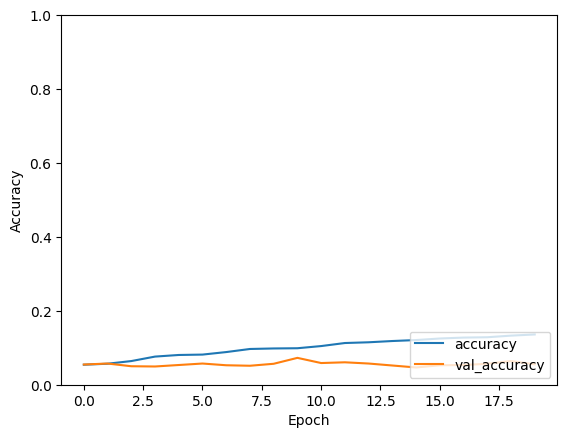

In [ ]:
ENB0_20 = activate_efficientnetb0(0.2)
MyCNNB0_20,history_MyCNNB0_20 =  MyCNNB0_Builder(ENB0_20,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNNB0_20)

Epoch 1/20
266/266 [==============================] - 22s 33ms/step - loss: 2.9612 - accuracy: 0.0940 - val_loss: 2.9991 - val_accuracy: 0.0520
Epoch 2/20
266/266 [==============================] - 7s 27ms/step - loss: 2.7618 - accuracy: 0.1559 - val_loss: 2.8670 - val_accuracy: 0.1513
Epoch 3/20
266/266 [==============================] - 8s 29ms/step - loss: 2.6513 - accuracy: 0.1852 - val_loss: 3.1103 - val_accuracy: 0.1100
Epoch 4/20
266/266 [==============================] - 7s 26ms/step - loss: 2.5809 - accuracy: 0.2033 - val_loss: 2.8257 - val_accuracy: 0.1620
Epoch 5/20
266/266 [==============================] - 8s 28ms/step - loss: 2.4987 - accuracy: 0.2271 - val_loss: 3.3515 - val_accuracy: 0.0833
Epoch 6/20
266/266 [==============================] - 8s 28ms/step - loss: 2.4604 - accuracy: 0.2379 - val_loss: 3.4484 - val_accuracy: 0.1227
Epoch 7/20
266/266 [==============================] - 7s 25ms/step - loss: 2.4078 - accuracy: 0.2513 - val_loss: 2.9471 - val_accuracy: 0.124

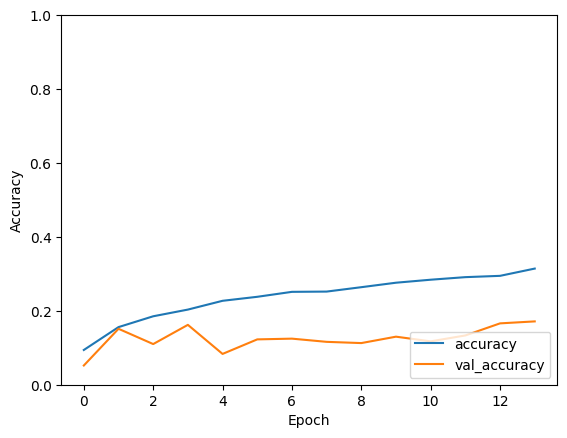

In [ ]:
ENB0_50 = activate_efficientnetb0(0.5)
MyCNNB0_50,history_MyCNNB0_50 =  MyCNNB0_Builder(ENB0_50,"sgd",20, 32, augmentation = True, dropout = True, callbacks = callbacks)
plot(history_MyCNNB0_50)

In [ ]:
val_acc ={}
test_acc ={}
_, test_acc["0%"] = MyCNNB0_0.evaluate(x_test,  y_test, verbose=2)
_, test_acc["20%"] = MyCNNB0_20.evaluate(x_test,  y_test, verbose=2)
_, test_acc["50%"] = MyCNNB0_50.evaluate(x_test,  y_test, verbose=2)
val_acc["0%"] = history_MyCNNB0_0.history['val_accuracy'][-1]
val_acc["20%"] = history_MyCNNB0_20.history['val_accuracy'][-1]
val_acc["50%"] = history_MyCNNB0_50.history['val_accuracy'][-1]


val_acc = dict(sorted(val_acc.items(),key=lambda x:x[1],reverse = True))
test_acc = dict(sorted(test_acc.items(),key=lambda x:x[1],reverse = True))

print("---------------")
print("Val Accuracy : ")
[print(key,':',value) for key, value in val_acc.items()]
# print(test_loss)
print("---------------")
print("Test Accuracy : ")
[print(key,':',value) for key, value in test_acc.items()]
print("---------------")

63/63 - 1s - loss: 2.9960 - accuracy: 0.0520 - 577ms/epoch - 9ms/step
63/63 - 1s - loss: 3.0155 - accuracy: 0.0565 - 734ms/epoch - 12ms/step
63/63 - 1s - loss: 2.8726 - accuracy: 0.1545 - 630ms/epoch - 10ms/step
---------------
Val Accuracy : 
50% : 0.17133332788944244
20% : 0.05533333495259285
0% : 0.05066666752099991
---------------
Test Accuracy : 
50% : 0.15449999272823334
20% : 0.05649999901652336
0% : 0.052000001072883606
---------------


***Σχολιασμός Αποτελεσμάτων:***

Η χρήση Transfer Learning, όπως επίσης και η επανεκπαίδευση μεγαλύτερου ποσοστού των επιπέδων της συνελικτικής βάσης και στις δύο περιπτώσεις, επιτυγχάνει σημαντικά μεγαλύτερη ακρίβεια αποτελεσμάτων. Η επανεκπαίδευση μεγαλύτερου ποσοστού των επιπέδων της συνελικτικής βάσης, επιτυγχάνει σημαντικά μεγαλύτερη ακρίβεια αποτελεσμάτων με ανάλογη αύξηση στον χρόνο εκπαίδευσης. 


## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
